# Housing Data Model
In this python notebook, I will do some exploratory data analysis of the housing dataset and train a model to predict sale price for unknowns.

## Importing relevant libraries

In [73]:
# Importing Pandas library for data manipulation and analysis
import pandas as pd

# Importing Numpy library for numerical operations
import numpy as np

# Importing visualization libraries: Seaborn for statistical plots, and Matplotlib for general plotting
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors  # Importing color utilities from Matplotlib for color handling

# Importing LinearRegression model from Scikit-Learn for linear modeling
from sklearn.linear_model import LinearRegression

# Importing train_test_split for splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split

# Importing Statsmodels library for statistical modeling, specifically Ordinary Least Squares (OLS) regression
import statsmodels.api as sm

# Importing chain and combinations from itertools for generating combinations of predictors (used in feature selection)
from itertools import chain, combinations

# Importing metrics for model evaluation: mean_squared_error for RMSE, r2_score for percentage accuracy, and mean_absolute_percentage_error for MAPE
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

## Data Preprocessing
* I have pre-divided data set provided as project files and the description of features as well.
* I will load both of them start the preprocessing of the data, including following steps.
  *  Import the dataset
  *  Look at the dimensions and statistics
  *  Check the data type of various features
  *  Check the distribution of target variable
  *  Handle missing values

### Loading the dataset and looking at dims and stats

In [50]:
#Loading Training Dataset
housing_data_test = pd.read_csv('https://raw.githubusercontent.com/Arpan-shrma/Housing_data/refs/heads/main/Housing_Data_Test.csv')
#Loading Testing Dataset
housing_data_train = pd.read_csv('https://raw.githubusercontent.com/Arpan-shrma/Housing_data/refs/heads/main/Housing_Data_Train.csv')

In [51]:
print(housing_data_train.head())
print(housing_data_test.head())

   Unnamed: 0    Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley  \
0           0   149          20       RL         63.0     7500   Pave   NaN   
1           1   460          50       RL          NaN     7015   Pave   NaN   
2           2  1336          20       RL         80.0     9650   Pave   NaN   
3           3   805          20       RL         75.0     9000   Pave   NaN   
4           4  1396          60       RL         88.0    12665   Pave   NaN   

  LotShape LandContour  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0      Reg         Lvl  ...        0    NaN   NaN         NaN       0      4   
1      IR1         Bnk  ...        0    NaN   NaN         NaN       0      7   
2      Reg         Lvl  ...        0    NaN   NaN         NaN       0      4   
3      Reg         Lvl  ...        0    NaN  GdWo         NaN       0      6   
4      IR1         Lvl  ...        0    NaN   NaN         NaN       0      2   

  YrSold SaleType  SaleCondition  SalePrice 

In [52]:
# Naming the first column to 'Sr Number'
# Its not that important for analysis, but just out of my good coding practices, I cant let one column be unnamed in my dataset
housing_data_train.rename(columns={housing_data_test.columns[0]: 'SrNumber'}, inplace=True)
housing_data_test.rename(columns={housing_data_test.columns[0]: 'SrNumber'}, inplace=True)

In [53]:
# Add a marker to distinguish between the training and test datasets
housing_data_train['marker'] = 1 # 1 for train
housing_data_test['marker'] = 0  # 0 for test

In [54]:
# Combine the datasets
combined_data = pd.concat([housing_data_train, housing_data_test], axis=0, ignore_index=True)

#this command was suggested to me by ChatGPT"

In [55]:
combined_data.shape

(1446, 83)

In [56]:
# Assuming combined_data is your DataFrame
data_types = combined_data.dtypes

# Group features by their data type
grouped_data_types = data_types.groupby(data_types).groups

# Print the data types and corresponding features
for data_type, features in grouped_data_types.items():
    # Join the feature names into a comma-separated string
    features_list = ', '.join(features)
    print(f"{data_type}: {features_list}")

int64: SrNumber, Id, MSSubClass, LotArea, OverallQual, OverallCond, YearBuilt, YearRemodAdd, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd, Fireplaces, GarageCars, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold, marker
float64: LotFrontage, MasVnrArea, GarageYrBlt, SalePrice
object: MSZoning, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, Heating, HeatingQC, CentralAir, Electrical, KitchenQual, Functional, FireplaceQu, GarageType, GarageFinish, GarageQual, GarageCond, PavedDrive, PoolQC, Fence, MiscFeature, SaleType, SaleCondition


In [57]:
# Summary statistics for numerical features
print(combined_data.describe())

# Display the first few rows to get a feel for the data
print(combined_data.head())

          SrNumber           Id   MSSubClass  LotFrontage        LotArea  \
count  1446.000000  1446.000000  1446.000000  1187.000000    1446.000000   
mean    414.062932   730.565698    57.026279    69.908172   10453.750346   
std     281.361403   422.340720    42.441191    24.122631    9931.633176   
min       0.000000     1.000000    20.000000    21.000000    1300.000000   
25%     180.250000   364.250000    20.000000    59.000000    7536.250000   
50%     361.000000   729.500000    50.000000    69.000000    9468.500000   
75%     637.750000  1096.750000    70.000000    80.000000   11522.500000   
max     999.000000  1460.000000   190.000000   313.000000  215245.000000   

       OverallQual  OverallCond    YearBuilt  YearRemodAdd   MasVnrArea  ...  \
count  1446.000000  1446.000000  1446.000000   1446.000000  1438.000000  ...   
mean      6.090595     5.582988  1971.217151   1984.869986   100.876217  ...   
std       1.349390     1.112229    30.126214     20.585505   174.019316  ..

### Distribution of Target variable

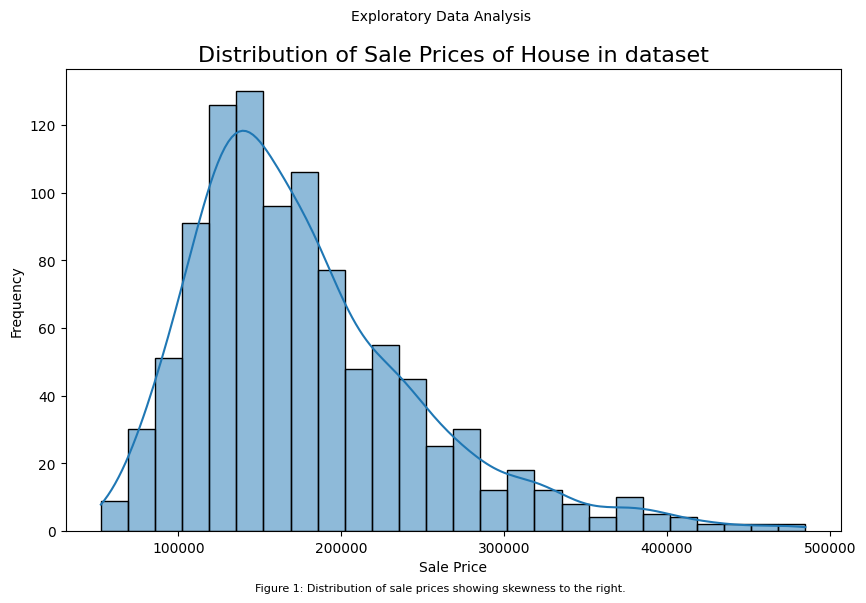

In [58]:
# Histogram of Sale Price
plt.figure(figsize=(10, 6))
sns.histplot(housing_data_train['SalePrice'].dropna(), kde=True)
plt.title('Distribution of Sale Prices of House in dataset', fontsize=16)
plt.suptitle('Exploratory Data Analysis', fontsize=10)
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.figtext(0.5, 0.01, 'Figure 1: Distribution of sale prices showing skewness to the right.', ha='center', fontsize=8)
plt.show()

### Handling missing data

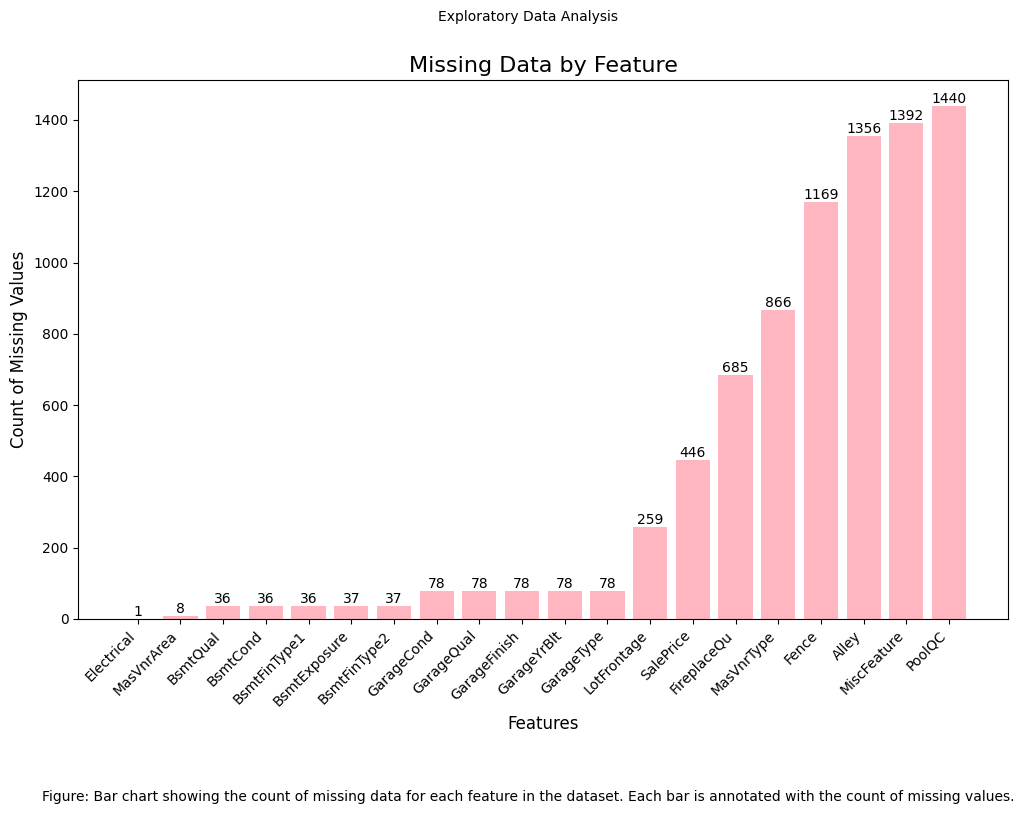

In [59]:
# Visualize missing data
missing = combined_data.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)

# Plotting the missing data counts
plt.figure(figsize=(12, 7))
bars = plt.bar(missing.index, missing.values, color='lightpink')
plt.title('Missing Data by Feature', fontsize=16)
plt.suptitle('Exploratory Data Analysis', fontsize=10)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Count of Missing Values', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate x-axis labels for better readability

# Adding text annotations on the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center', fontsize=10, color='black')

plt.figtext(0.5, -0.15, 'Figure: Bar chart showing the count of missing data for each feature in the dataset. Each bar is annotated with the count of missing values.', ha='center', fontsize=10)  # Caption
plt.show()

* From the visualization, lets ignore SalePrice column as it has null values from test set.
* I have decided not to drop any feature. To handle features with more than 75% NA values in the columns, I have converted them into Binary features.

In [60]:
# Define the features with more than 75% missing values
features_high_na = ['Fence', 'Alley', 'MiscFeature', 'PoolQC']

# Convert these features to binary indicators
for feature in features_high_na:
    combined_data[feature + '_Exists'] = combined_data[feature].notna().astype(int)

# Drop the original columns
combined_data.drop(columns=features_high_na, inplace=True)

* There is only one na value in Electrical column and is a categorical variable so lets replace the value with most common category i.e., mode value.

In [61]:
# As there is only 1 nan value in 'Electrical' feature i am imputing it with most common category i.e., mode value
# Finding the mode of the 'Electrical' feature
mode_electrical = combined_data['Electrical'].mode()[0]
# Fill in missing values with the mode
combined_data['Electrical'] = combined_data['Electrical'].fillna(mode_electrical)

* Now, from data_description its mentioned that for some of the categorical features na means absence of feature so i am going to impute them later while encoding.
* For Numerical variables like 'MasVrnArea', I replace the null values with 0 which represents no area as there is no Masonry veneer.

In [63]:
# Define categories where NaN means the absence of a feature
absence_labels = {
    'GarageType': 'N', 'GarageFinish': 'N', 'GarageQual': 'N', 'GarageCond': 'N',
    'BsmtQual': 'N', 'BsmtCond': 'N', 'BsmtExposure': 'N', 'BsmtFinType1': 'No Basement', 'BsmtFinType2': 'No Basement'
    , 'FireplaceQu': 'N'
}


# Fill NaNs using a dictionary of labels
for col, label in absence_labels.items():
    combined_data[col] = combined_data[col].fillna(label)

# Example for numeric features: filling NaNs with 0
numeric_cols_with_na = ['MasVnrArea']
for col in numeric_cols_with_na:
    combined_data[col] = combined_data[col].fillna(0)

* Moving further, there is a problem with feature 'LotFrontage' which represents the linear feet of street connected to a property. It has 259 null values, but as it can be an important feature i cannot impute the values with 0. So, I am imputing the values with median value for similar lot configuration and lots from same neighborhood.

In [64]:
# Calculate the medians
group_medians = combined_data.groupby(['Neighborhood', 'LotConfig'])['LotFrontage'].median()
neighborhood_medians = combined_data.groupby('Neighborhood')['LotFrontage'].median()
overall_median = combined_data['LotFrontage'].median()

# First pass: apply group medians (this command was suggested to me by ChatGPT)
combined_data['LotFrontage'] = combined_data.apply(
    lambda row: group_medians.get((row['Neighborhood'], row['LotConfig']), np.nan) if pd.isna(row['LotFrontage']) else row['LotFrontage'],
    axis=1
)
# Second pass: use neighborhood medians where group medians failed
combined_data['LotFrontage'] = combined_data['LotFrontage'].fillna(combined_data['Neighborhood'].map(neighborhood_medians))

# Final pass: use the overall median where neighborhood medians failed
combined_data['LotFrontage'] = combined_data['LotFrontage'].fillna(overall_median)

### Handling Year Related data


* To handle GarageYrBlt, I have used binning technique and converted the feature with year into categorical varianle. Each description of category is as follows:
 1. Built with House: If garage built year is same as house built year.
 2. Modified with House: If garage built year is same as remodel date
 3. Other Year: If garage built year is different than both.
 4. No Garage: If there is no garage built year.


In [62]:
# Define the categorization function
def categorize_garage(row):
    if pd.isna(row['GarageYrBlt']):
        return 'No Garage'
    elif row['GarageYrBlt'] == row['YearBuilt']:
        return 'Built with House'
    elif row['GarageYrBlt'] == row['YearRemodAdd']:
        return 'Modified with House'
    else:
        return 'Other Year'

# Apply the function to categorize the garage years
combined_data['GarageCategory'] = combined_data.apply(categorize_garage, axis=1)

* Data including features like YrSold, MoSold, YearBuilt, and YearRemodAdd. I have used these features and combined them to make new feature.
 1. AgeAtSale : This feature represents Age of the house at date of Sale.
 2. YearsSinceRenovation: This feature represents Age of house since last renovation.

In [65]:
# #Handling Year related data
# Convert 'YrSold' and 'MoSold' into a datetime format to represent the sale date
combined_data['SaleDate'] = pd.to_datetime(combined_data['YrSold'].astype(str) + '-' + combined_data['MoSold'].astype(str))

# Convert 'YearBuilt' and 'YearRemodAdd' into a datetime format (assuming remodeling and building happened mid-year, approximate with June)
combined_data['BuiltDate'] = pd.to_datetime(combined_data['YearBuilt'].astype(str) + '-6')
combined_data['RenovatedDate'] = pd.to_datetime(combined_data['YearRemodAdd'].astype(str) + '-6')

# Calculate the 'AgeAtSale' in years as a float
combined_data['AgeAtSale'] = (combined_data['SaleDate'] - combined_data['BuiltDate']).dt.days / 365.25

# Calculate the 'YearsSinceRenovation' in years as a float
combined_data['YearsSinceRenovation'] = (combined_data['SaleDate'] - combined_data['RenovatedDate']).dt.days / 365.25


In [66]:
columns_with_na = combined_data.columns[combined_data.isnull().any()].tolist()

# Print the names of columns that have missing values
print("Columns with missing values:", columns_with_na)

Columns with missing values: ['MasVnrType', 'GarageYrBlt', 'SalePrice']


In [67]:
# Drop columns used to calculate AgeAtSale and YearsSinceRenovation #this command was suggested to me by Gemini
# Also dropping columns including sr_number and id which will not be used in model
combined_data = combined_data.drop(['YrSold', 'MoSold', 'YearBuilt', 'YearRemodAdd', 'SaleDate', 'BuiltDate', 'RenovatedDate','Id', 'SrNumber', 'GarageYrBlt'], axis=1)



### Inspecting features for final data preprocessing


#### Analyzing numerical variables
* I am inspecting correlation of numerical variables with target variable

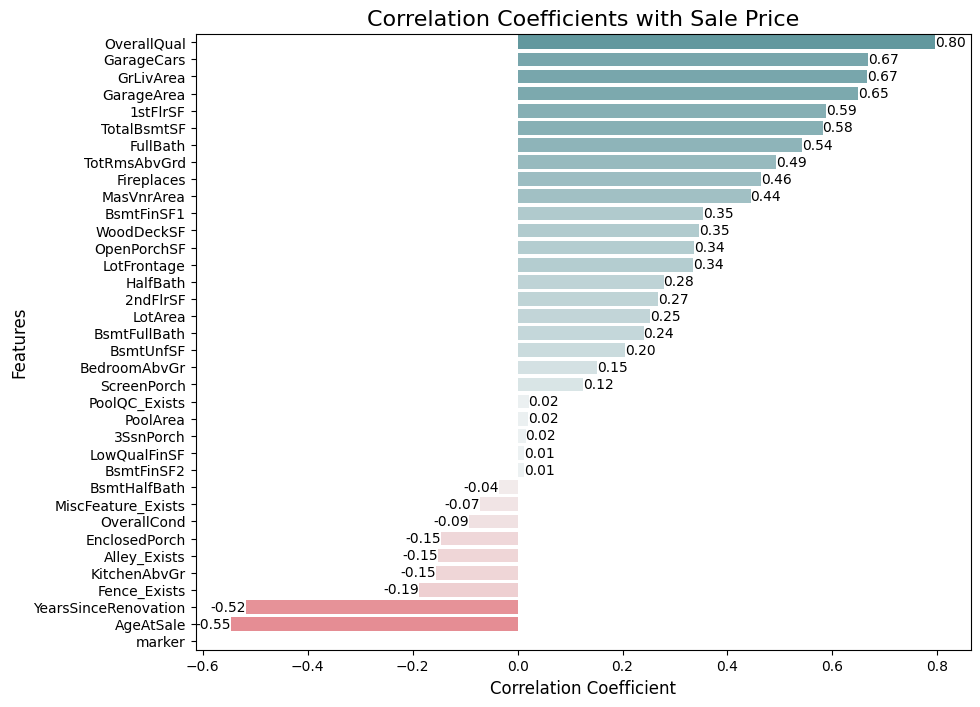

In [68]:
# List of columns to exclude
columns_to_exclude = ['MSSubClass', 'MiscVal']

# Select only numeric columns and drop the specified columns
numeric_columns = combined_data.select_dtypes(include=[np.number]).drop(columns=columns_to_exclude, errors='ignore')

# Calculate the full correlation matrix for the remaining numeric columns
correlation_matrix = numeric_columns.corr()

# Extract correlations with 'SalePrice' and remove 'SalePrice' from series to avoid self-correlation
saleprice_correlations = correlation_matrix['SalePrice'].drop('SalePrice')

# Sort the correlations for better visibility in the plot
sorted_correlations = saleprice_correlations.sort_values(ascending=False)

# Plotting the correlations with 'SalePrice'
plt.figure(figsize=(10, 8))
cmap = sns.diverging_palette(10, 205, as_cmap=True)  # Define a colormap
norm = mcolors.Normalize(vmin=-1, vmax=1)  # Normalize the correlation values

# Create a horizontal bar plot
barplot = sns.barplot(x=sorted_correlations.values, y=sorted_correlations.index, color="gray")

# Apply colors to bars #this command was suggested to me by ChatGPT
colors = [cmap(norm(value)) for value in sorted_correlations.values]
for bar, color in zip(barplot.patches, colors):
    bar.set_facecolor(color)

# Annotate the correlation coefficients on the bars #this command was suggested to me by ChatGPT
for index, (value, bar) in enumerate(zip(sorted_correlations.values, barplot.patches)):
    if np.isfinite(value):  # Check if the value is finite
        plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f"{value:.2f}",
                 va='center', ha='right' if value < 0 else 'left')

# plot titles and labels
plt.title('Correlation Coefficients with Sale Price', fontsize=16)
plt.xlabel('Correlation Coefficient', fontsize=12)
plt.ylabel('Features', fontsize=12)

# print the plot
plt.show()

* From the above graph it can be interpreted that there two variable which have comparitively strong negative correlation. Also, various variables which have high positive correlation with the SalePrice.

#### Analyzing Categorical Variables
* Now I am converting categorical variables to numerical features. For this I am making comparison to see if i should do mixed encoding i.e., ordinal encoding and onehot encoding or only one hot encoding for categorical features.
* For mixed encoding -
 * I am using ordinal encoding for features which have natural order to them like OverallQual & OverallCond (already in order), ExterQual & ExterCond,BsmtQual, BsmtCond,BsmtExposure, HeatingQC, KitchenQual, FireplaceQu, GarageFinish, GarageQual & GarageCond,PoolQC, and Fence. and using one hot encoding for rest of the categorical variable.

In [70]:
# Mapping of features to their categories
ordinal_features = {
    'ExterQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'ExterCond': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'BsmtQual': ['N', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'BsmtCond': ['N', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'BsmtExposure': ['N', 'No', 'Mn', 'Av', 'Gd'],
    'HeatingQC': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'KitchenQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'FireplaceQu': ['N', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'GarageFinish': ['N', 'Unf', 'RFn', 'Fin'],
    'GarageQual': ['N', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'GarageCond': ['N','Po', 'Fa', 'TA', 'Gd', 'Ex']
}

# Function to check if median prices are in ascending order for the specified mapping
def check_median_order(df, feature, order):
    medians = {}
    for category in order:
        if category in df[feature].unique():
            median_value = df[df[feature] == category]['SalePrice'].median()
            if pd.notna(median_value):  # Ignoring NaN median values
                medians[category] = median_value

    # Extract median values in the order they appear in the 'order' list, ignoring missing categories
    ordered_medians = [medians[cat] for cat in order if cat in medians]

    # Diagnostic output
    # print(f"Medians for {feature}: {medians}")
    # print(f"Ordered medians: {ordered_medians}")    <-------------Uncomment incase of error.

    # Check if the list of medians is strictly increasing
    return ordered_medians == sorted(ordered_medians) and len(ordered_medians) > 1

# Applying the check across multiple features
results = {feature: check_median_order(combined_data, feature, ordinal_features[feature]) for feature in ordinal_features}

# Segregate features based on whether they have ascending median order or not
have_order = {feature: True for feature, result in results.items() if result}
not_have_order = {feature: False for feature, result in results.items() if not result}

# Display the results
print("Features that have order:", have_order)
print("Features that do not have order:", not_have_order)

Features that have order: {'ExterQual': True, 'BsmtQual': True, 'BsmtExposure': True, 'HeatingQC': True, 'KitchenQual': True, 'FireplaceQu': True, 'GarageFinish': True}
Features that do not have order: {'ExterCond': False, 'BsmtCond': False, 'GarageQual': False, 'GarageCond': False}


* Moving further, As we have list of features which hold natural order, we are going to do ordinal mapping for those features.

In [23]:
# Ordinal feature mappings
ordinal_mappings = {
    'ExterQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1},
    'BsmtQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'N': 0},
    'BsmtExposure': {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'N': 0},
    'HeatingQC': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1},
    'KitchenQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1},
    'FireplaceQu': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'N': 0},
    'GarageFinish': {'Fin': 3, 'RFn': 2, 'Unf': 1, 'N': 0}
}

# Applying the ordinal mappings
for feature, mapping in ordinal_mappings.items():
    combined_data[feature] = combined_data[feature].map(mapping)

# List of nominal features for one-hot encoding
nominal_features = [
    'MSZoning', 'Street', 'LandContour', 'Utilities', 'LotConfig',
    'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
    'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
    'Foundation', 'Heating', 'CentralAir', 'Electrical', 'GarageType',
    'PavedDrive', 'SaleType', 'SaleCondition','LotShape',
    'LandSlope', 'BsmtFinType1', 'BsmtFinType2', 'Functional','MSSubClass',
    'GarageCategory','MasVnrType','ExterCond','BsmtCond','GarageCond','GarageQual'
]

# Applying one-hot encoding
combined_data = pd.get_dummies(combined_data, columns=nominal_features, drop_first=True)

In [24]:
# Prepare Data with Complete One-Hot Encoding
# Prepare a copy of the original data to avoid altering combined_data
all_one_hot_data = combined_data.copy()

# Convert all originally ordinal features to their categorical type before one-hot encoding
for feature in ordinal_mappings.keys():
    if feature in all_one_hot_data.columns:
        all_one_hot_data[feature] = all_one_hot_data[feature].astype('category')

# Apply one-hot encoding to all categorical features
all_one_hot_encoded_data = pd.get_dummies(all_one_hot_data, drop_first=True)

* Split Data for Both Models

In [25]:
# Separate the training data
df_housing_train_ord = combined_data[combined_data['marker'] == 1].drop(columns=['marker'])

# Separate the testing data
df_housing_train_oh = all_one_hot_encoded_data[all_one_hot_encoded_data['marker'] == 1].drop(columns=['marker'])

In [27]:
# Data with mixed encoding
X_mixed = df_housing_train_ord.drop('SalePrice', axis=1)  # Assuming SalePrice is the target
y = df_housing_train_ord['SalePrice']
X_train_mixed, X_test_mixed, y_train, y_test = train_test_split(X_mixed, y, test_size=0.2, random_state=42)

# Data with complete one-hot encoding
X_one_hot = df_housing_train_oh.drop('SalePrice', axis=1)
X_train_one_hot, X_test_one_hot, _, _ = train_test_split(X_one_hot, y, test_size=0.2, random_state=42)

* Model Training and Evaluation

In [28]:
# Train and evaluate the mixed encoding model
model_mixed = LinearRegression().fit(X_train_mixed, y_train)
mse_mixed = mean_squared_error(y_test, model_mixed.predict(X_test_mixed))

# Train and evaluate the one-hot encoding model
model_one_hot = LinearRegression().fit(X_train_one_hot, y_train)
mse_one_hot = mean_squared_error(y_test, model_one_hot.predict(X_test_one_hot))

In [29]:
print("RMSE with Mixed Encoding:", round(np.sqrt(mse_mixed)))
print("RMSE with Complete One-Hot Encoding:", round(np.sqrt(mse_one_hot)))

RMSE with Mixed Encoding: 38514
RMSE with Complete One-Hot Encoding: 38306


* From the results it is apparent that there is no significant difference in RMSE while using either of the options for encoding. So, I will use one-hot encoding for further modeling.

In [30]:
# Separate the training data
df_housing_train = all_one_hot_encoded_data[combined_data['marker'] == 1].drop(columns=['marker'])

# Separate the testing data
df_housing_test = all_one_hot_encoded_data[combined_data['marker'] == 0].drop(columns=['marker'])

In [32]:
# Identify columns with NaN values
nan_columns = df_housing_train.columns[df_housing_train.isnull().any()]

# Print the columns that have NaN values
print("Columns with NaN values in df_housing_train:")
print(nan_columns)

Columns with NaN values in df_housing_train:
Index([], dtype='object')


In [33]:
# Convert boolean columns to integers in both train and test dataset
for col in df_housing_train.select_dtypes(include=['bool']).columns:
    df_housing_train[col] = df_housing_train[col].astype(int)
for col in df_housing_test.select_dtypes(include=['bool']).columns:
    df_housing_test[col] = df_housing_test[col].astype(int)
# Ensure all columns are numeric
df_housing_train = df_housing_train.apply(pd.to_numeric, errors='coerce')
df_housing_test = df_housing_test.apply(pd.to_numeric, errors='coerce')

## Modelling and Model Tuning

* Now we have a clean processed dataframe splitted into training set : df_housing_train and testing set : df_housing_test.
* I am going to use Ordinary Least Squares (OLS) regression technique for modeling.

### Feature Subset Selection

* I am now implementing forward selection to identify the optimal subset of predictors for predicting house prices, using RMSE as the evaluation metric.
* The processSubset function fits an Ordinary Least Squares (OLS) model for each subset of features and calculates the Root Mean Square Error (RMSE).
* The forward function iteratively adds the predictor that most reduces RMSE at each step, building the model step-by-step by including features that improve the model’s accuracy. In this approach, once a predictor is added, it remains in the model.

In [34]:
# Reused from git repository for data 6100 by mcnica89
# function to fit a model on the specified subset of features and calculates RMSE
def processSubset(feature_set, X_train, y_train, X_test, y_test):
    # Fit model on feature_set and calculate RMSE
    model = sm.OLS(y_train,X_train[list(feature_set)])
    regr = model.fit()
    RMSE = float(np.sqrt(np.mean((regr.predict(X_test[list(feature_set)]) - y_test)**2)))
    return {'p':len(feature_set),'features':feature_set, 'model':regr, 'RMSE':RMSE}

# function to perform forward selection to identify the best predictors
def forward(predictors, X_train, y_train, X_test, y_test):

    # to keep track of predictors that have not been included in the model yet
    remaining_predictors = [p for p in X_train.columns if p not in predictors]

    results = []

    for p in remaining_predictors:
        results.append(processSubset(predictors+[p], X_train, y_train, X_test, y_test))

    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)


    # Display models for debugging
    #print("----Models:\n----", models['features'],models['RMSE'])    #<------Uncomment this command to check the step and debug in case of error
    print("----Models:\n----", models['p'],models['RMSE'])

    # Choose the model with the lowest RMSE
    best_model = models.loc[models['RMSE'].argmin()]

    # Return the best model, along with some other useful information about the model
    return best_model

In [35]:
# Defining the features (excluding the target variable 'SalePrice') and the target for the best predictor subset selection
df_train_subset_x = df_housing_train.drop(['SalePrice'], axis=1)
df_train_subset_y = df_housing_train['SalePrice']

#### Initial Subset Selection using Train/Test split

* Training and Testing Split: Data is split into training and testing sets to validate model performance on unseen data.
* Forward Selection Process: For each iteration, the feature set that minimizes RMSE is identified and stored. The selected predictors are updated iteratively in predictors to include the features chosen in each step. This approach finds the best model with the least prediction error and the smallest number of predictors. models_train for the test dataset, evaluating how well the selected features generalize.

In [36]:
# Reused from git repository for data 6100 by mcnica89

# Splitting the data into training and testing sets:
model_X_train, model_X_test, model_y_train, model_y_test = train_test_split(df_train_subset_x, df_train_subset_y, test_size=0.2, random_state=3)

# Initialize a DataFrame to store the results of the training model with specified columns
models_train = pd.DataFrame(columns=['p','RMSE','features', 'model'])

# List to keep track of currently selected predictors
predictors = []

# Iterate through range of column to test features and find best set of predictor with those of the best model found in the current iteration
for i in range(1,len(df_train_subset_x.columns)+1):
    models_train.loc[i] = forward(predictors, model_X_train, model_y_train, model_X_test, model_y_test)
    predictors = models_train.loc[i]['model'].model.exog_names #update the list of predictors to include the predictors of the best model found in the current iteration

Streaming output truncated to the last 5000 lines.
3      152
4      152
      ... 
106    152
107    152
108    152
109    152
110    152
Name: p, Length: 111, dtype: int64 0      29674.230220
1      30054.617428
2      27764.400546
3      34345.680104
4      27335.207411
           ...     
106    31152.418450
107    29394.215948
108    29317.259185
109    27903.589466
110    27378.580785
Name: RMSE, Length: 111, dtype: float64
----Models:
---- 0      153
1      153
2      153
3      153
4      153
      ... 
105    153
106    153
107    153
108    153
109    153
Name: p, Length: 110, dtype: int64 0      29804.888640
1      29994.905905
2      27799.086439
3      34338.609976
4      27410.626089
           ...     
105    31159.609033
106    29448.917986
107    29332.491462
108    27920.592413
109    27409.712372
Name: RMSE, Length: 110, dtype: float64
----Models:
---- 0      154
1      154
2      154
3      154
4      154
      ... 
104    154
105    154
106    154
107    154
108   

In [37]:
# Typecast RMSE column to numeric type
models_train['RMSE'] = models_train['RMSE'].astype(float)

# Find the minimum RMSE value and the corresponding index
min_rmse = models_train['RMSE'].min()
min_rmse_index = models_train['RMSE'].idxmin()
print(f'Min RMSE: {min_rmse:.2f}\nPredictors: {min_rmse_index}')

Min RMSE: 26609.24
Predictors: 116


* Plotting the test rmse vs number of predictors

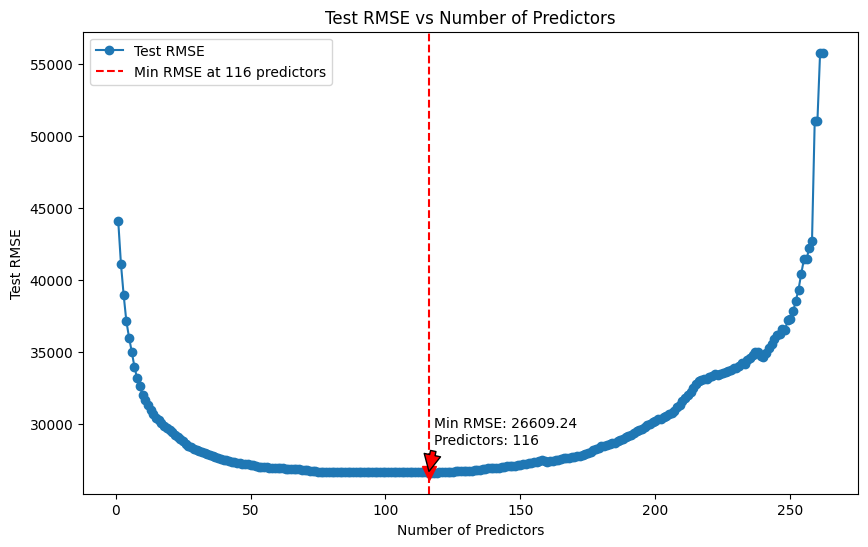

In [38]:
# Extracting the RMSE values for plotting
rmse_values = models_train['RMSE']
num_predictors = list(range(1, len(rmse_values) + 1))

# Find the minimum RMSE value and the corresponding index
min_rmse = rmse_values.min()
min_rmse_index = rmse_values.idxmin()

# Plotting RMSE vs Number of Predictors
plt.figure(figsize=(10, 6))
plt.plot(num_predictors, rmse_values, label='Test RMSE', marker='o')

# Highlight the minimum RMSE point
plt.axvline(min_rmse_index, linestyle='--', color='red', label=f'Min RMSE at {min_rmse_index} predictors')
plt.plot(min_rmse_index, min_rmse, 'v', markersize=10, color='red')  # Mark the minimum RMSE point

# Annotation for minimum RMSE and the predictor number
plt.annotate(f'Min RMSE: {min_rmse:.2f}\nPredictors: {min_rmse_index}',
             xy=(min_rmse_index, min_rmse),
             xytext=(min_rmse_index + 2, min_rmse + 2000),  # Position text a bit to the right and above
             arrowprops=dict(facecolor='red', shrink=0.05))

# Labeling the plot
plt.xlabel('Number of Predictors')
plt.ylabel('Test RMSE')
plt.title('Test RMSE vs Number of Predictors')
plt.legend()
plt.show()

#### Feature Selection Tuning

The graph above shows the U-curve, with min RMSE at 116 predictors


* After conducting forward stepwise selection, I identified a “magic number” of 116 predictors as the optimal number that yielded the lowest RMSE on the test set. This number reflects the model’s best balance of complexity and predictive accuracy when evaluated on unseen data.

* To further improve model stability and generalizability, I repeated the forward selection process on the entire training dataset to identify the best subset of 116 predictors. Since the initial model was built on a portion of the data (with some data hidden), re-selecting the best 116 predictors on the full training set allows the model to leverage the complete information available.

* This approach ensures that the final model is trained on the most representative and robust subset of features, optimized across the full dataset rather than being influenced by the variability of a data split.

In [39]:
# Reused from git repository for data 6100 by mcnica89
# Initialize a DataFrame to store the results of the full model with specified columns
models_full = pd.DataFrame(columns=['p','RMSE','features', 'model'])

# List to keep track of currently selected predictors
predictors = []

# Iterate through range of column to test features and find best set of predictor with those of the best model found in the current iteration
for i in range(1,len(df_train_subset_x.columns)+1):
    models_full.loc[i] = forward(predictors, df_train_subset_x, df_train_subset_y, df_train_subset_x, df_train_subset_y)
    predictors = models_full.loc[i]['model'].model.exog_names
models_full['RMSE'] = models_full['RMSE'].astype(float)

# Find the minimum RMSE value and the corresponding index
min_rmse = models_full['RMSE'].min()
min_rmse_index = models_full['RMSE'].idxmin()
print(f'Min RMSE: {min_rmse:.2f}\nPredictors: {min_rmse_index}')

Streaming output truncated to the last 5000 lines.
      ... 
106    152
107    152
108    152
109    152
110    152
Name: p, Length: 111, dtype: int64 0      18549.950652
1      18553.909406
2      18553.342311
3      18553.342311
4      18548.339301
           ...     
106    18548.566969
107    18553.255197
108    18552.986679
109    18552.196358
110    18552.196358
Name: RMSE, Length: 111, dtype: float64
----Models:
---- 0      153
1      153
2      153
3      153
4      153
      ... 
105    153
106    153
107    153
108    153
109    153
Name: p, Length: 110, dtype: int64 0      18542.842906
1      18547.172596
2      18546.574371
3      18546.574371
4      18541.731066
           ...     
105    18541.421571
106    18546.315113
107    18546.029871
108    18545.632919
109    18545.632919
Name: RMSE, Length: 110, dtype: float64
----Models:
---- 0      154
1      154
2      154
3      154
4      154
      ... 
104    154
105    154
106    154
107    154
108    154
Name: p, Length: 

Here, I am plotting the training RMSE to show how RMSE correlate with increasing number of predictors.

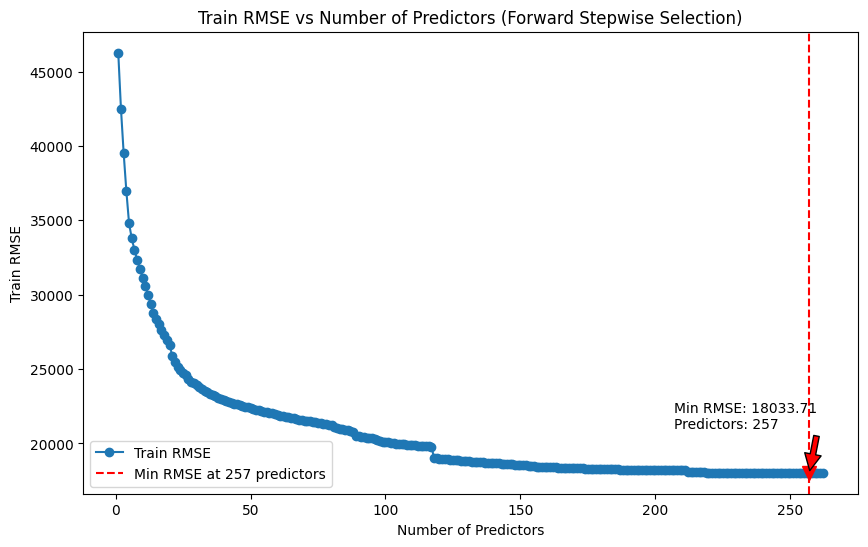

In [40]:
# Extracting the RMSE values for plotting
rmse_values = models_full['RMSE']
num_predictors = list(range(1, len(rmse_values) + 1))  # Assuming you have one RMSE per model/predictor count

# Find the minimum RMSE value and the corresponding index
min_rmse = rmse_values.min()
min_rmse_index = rmse_values.idxmin()

# Plotting RMSE vs Number of Predictors
plt.figure(figsize=(10, 6))
plt.plot(num_predictors, rmse_values, label='Train RMSE', marker='o')

# Highlight the minimum RMSE point
plt.axvline(min_rmse_index, linestyle='--', color='red', label=f'Min RMSE at {min_rmse_index} predictors')
plt.plot(min_rmse_index, min_rmse, 'v', markersize=10, color='red')  # Mark the minimum RMSE point

# Add annotation for minimum RMSE and the predictor number
plt.annotate(f'Min RMSE: {min_rmse:.2f}\nPredictors: {min_rmse_index}',
             xy=(min_rmse_index, min_rmse),
             xytext=(min_rmse_index - 50, min_rmse + 3000),  # Position text a bit to the right and above
             arrowprops=dict(facecolor='red', shrink=0.05))

# Labeling the plot
plt.xlabel('Number of Predictors')
plt.ylabel('Train RMSE')
plt.title('Train RMSE vs Number of Predictors (Forward Stepwise Selection)')
plt.legend()
plt.show()

Applying the “Magic Number” of Predictors to the Full Dataset

In [71]:
# Find the index of the minimum RMSE in the DataFrame
min_rmse_index = models_train['RMSE'].idxmin()

# Extract the row with the minimum RMSE
min_rmse_row = models_train.loc[min_rmse_index]

#Number of predictors with minimum RMSE
pred_min_rmse = min_rmse_row['p']

# Print the number of features ('p') and RMSE for the model with the minimum RMSE
print("Number of predictors (p):", pred_min_rmse)
print("Minimum Test RMSE:", min_rmse_row['RMSE'])
print("Features:", min_rmse_row['features'])
# Filter the DataFrame for rows where 'p' equals number of predictors with minimum RMSE in test data
row_with_p_min = models_full[models_full['p'] == pred_min_rmse ]

# Print the features and RMSE for this row
selected_features = sorted(row_with_p_min['features'].iloc[0])  # Accessing the first item in the series if multiple rows exist
selected_features_rmse = row_with_p_min['RMSE'].iloc[0]

print("Selected Features from full dataset:", selected_features)
print("Train RMSE for selected features:", selected_features_rmse)

Number of predictors (p): 116
Minimum Test RMSE: 26609.242532429213
Features: ['OverallQual', 'BsmtQual_5', 'Neighborhood_NoRidge', 'GarageCars', 'Neighborhood_NridgHt', 'Neighborhood_Crawfor', 'GarageType_Detchd', 'Neighborhood_ClearCr', 'FireplaceQu_5', 'HeatingQC_5', 'LotShape_IR2', 'WoodDeckSF', 'ScreenPorch', 'LotConfig_CulDSac', 'Condition1_PosA', 'LandSlope_Mod', 'Neighborhood_Edwards', 'GarageType_N', 'MSSubClass_45', 'Neighborhood_Timber', 'Neighborhood_Somerst', 'MSZoning_RL', 'Neighborhood_StoneBr', 'OverallCond', 'FireplaceQu_3', 'MSSubClass_160', 'HalfBath', 'GarageType_CarPort', 'Neighborhood_OldTown', 'Condition1_Feedr', 'SaleType_CWD', 'Foundation_PConc', 'SaleCondition_Family', 'GarageQual_Gd', 'Functional_Maj2', 'Fence_Exists', 'BsmtFinType1_No Basement', 'Exterior2nd_CmentBd', 'Exterior1st_CemntBd', 'Neighborhood_SawyerW', 'MasVnrType_BrkFace', 'FireplaceQu_4', 'Exterior2nd_HdBoard', 'BsmtCond_Gd', 'BsmtFinType1_BLQ', 'RoofStyle_Mansard', 'HouseStyle_SFoyer', 'RoofSt

## Overfitting vs underfitting

* Here, I am plotting the Test Root mean square error and Train Root mean square error to show overfitting vs underfitting concept.

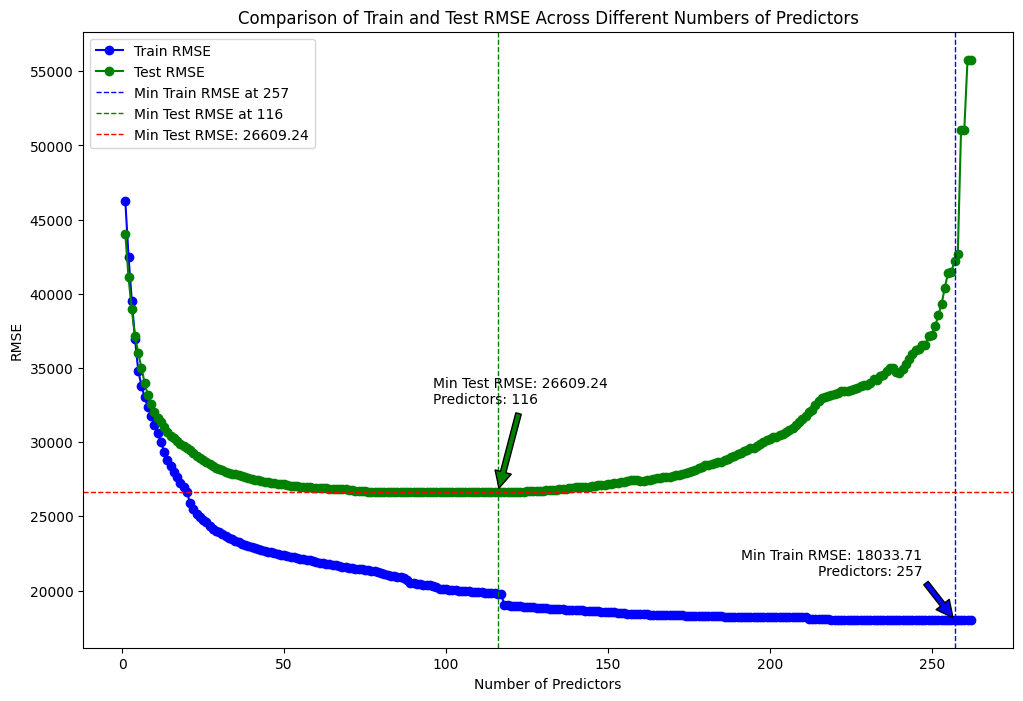

In [41]:
# Example RMSE data
train_rmse_values = models_full['RMSE']  # Replace with your actual RMSE data
test_rmse_values = models_train['RMSE']  # Replace with your actual RMSE data
num_predictors = list(range(1, len(train_rmse_values) + 1))

# Finding minimum RMSE and their indices for Train and Test
min_train_rmse = train_rmse_values.min()
min_train_index = train_rmse_values.idxmin()
min_test_rmse = test_rmse_values.min()
min_test_index = test_rmse_values.idxmin()

# Plotting
plt.figure(figsize=(12, 8))
plt.plot(num_predictors, train_rmse_values, 'b-', label='Train RMSE', marker='o')
plt.plot(num_predictors, test_rmse_values, 'g-', label='Test RMSE', marker='o')
plt.axvline(min_train_index, color='blue', linestyle='--', linewidth=1, label=f'Min Train RMSE at {min_train_index}')
plt.axvline(min_test_index, color='green', linestyle='--', linewidth=1, label=f'Min Test RMSE at {min_test_index}')
plt.axhline(y=min_test_rmse, color='red', linestyle='--', linewidth=1, label=f'Min Test RMSE: {min_test_rmse:.2f}')
# Annotations
plt.annotate(f'Min Train RMSE: {min_train_rmse:.2f}\nPredictors: {min_rmse_index}',
             xy=(min_train_index, min_train_rmse),
             xytext=(min_train_index-10, min_train_rmse+3000),
             arrowprops=dict(facecolor='blue', shrink=0.05),
             horizontalalignment='right')

plt.annotate(f'Min Test RMSE: {min_test_rmse:.2f}\nPredictors: {min_test_index}',
             xy=(min_test_index, min_test_rmse),
             xytext=(min_test_index-20, min_test_rmse+6000),
             arrowprops=dict(facecolor='green', shrink=0.05),
             horizontalalignment='left')

# Finalizing the plot
plt.xlabel('Number of Predictors')
plt.ylabel('RMSE')
plt.title('Comparison of Train and Test RMSE Across Different Numbers of Predictors')
plt.legend()
plt.show()

The graph above shows :
* The blue line showing the RMSE calculated using the entire dataset for training. As the number of predictors increases, the RMSE decreases and remains low, which typically indicates that the model is fitting the training data increasingly well. The sharp increase towards the end suggests overfitting as more predictors are added beyond the optimal point.
* The green line represents the RMSE on a hold-out test set. Initially, as more predictors are used, the RMSE decreases, indicating improving model performance. However, after a certain point (85 predictors), the RMSE starts to plateau and eventually increases, suggesting that adding more predictors leads to overfitting.
* In the inital phase, the low number of predictors leads to high RMSE which shows the underfitting.

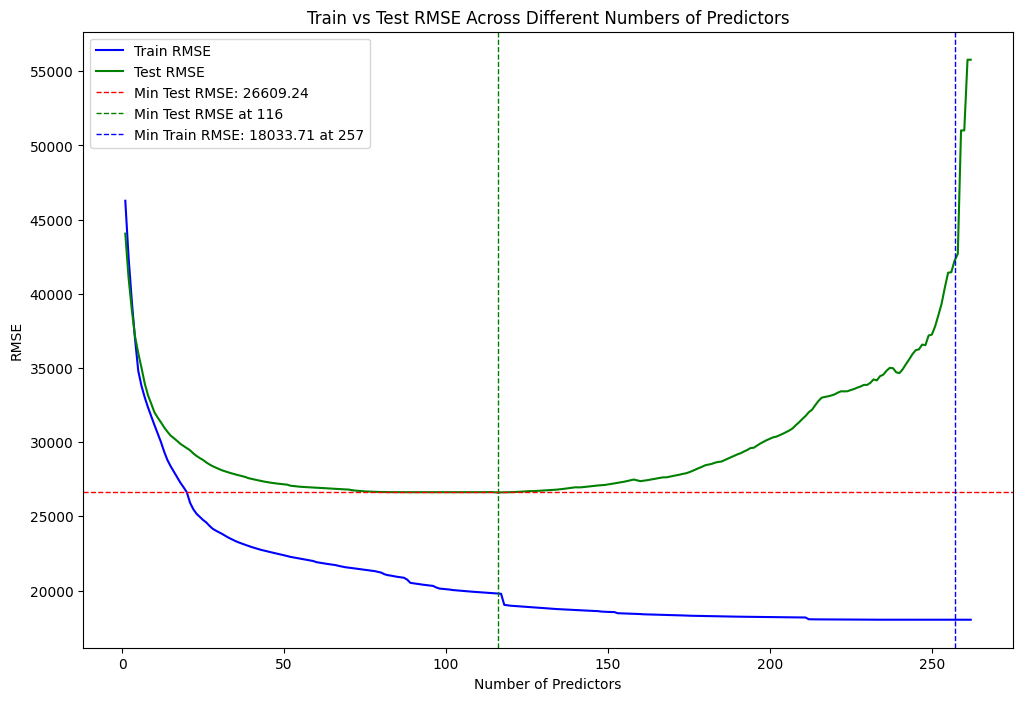

In [42]:
#Same as above, Just smooth line graph
train_rmse_values = models_full['RMSE']  # Replace with your actual RMSE data
test_rmse_values = models_train['RMSE']  # Replace with your actual RMSE data
num_predictors = list(range(1, len(train_rmse_values) + 1))

# Finding minimum RMSE and their indices for Train and Test
min_train_rmse = train_rmse_values.min()
min_train_index = train_rmse_values.idxmin()
min_test_rmse = test_rmse_values.min()
min_test_index = test_rmse_values.idxmin()

# Plotting
plt.figure(figsize=(12, 8))
plt.plot(num_predictors, train_rmse_values, 'b-', label='Train RMSE')
plt.plot(num_predictors, test_rmse_values, 'g-', label='Test RMSE')
plt.axhline(y=min_test_rmse, color='red', linestyle='--', linewidth=1, label=f'Min Test RMSE: {min_test_rmse:.2f}')  # Horizontal line at min Test RMSE
plt.axvline(min_test_index, color='green', linestyle='--', linewidth=1, label=f'Min Test RMSE at {min_test_index}')
plt.axvline(min_train_index, color='blue', linestyle='--', linewidth=1, label=f'Min Train RMSE: {min_train_rmse:.2f} at {min_train_index}')

# Finalizing the plot
plt.xlabel('Number of Predictors')
plt.ylabel('RMSE')
plt.title('Train vs Test RMSE Across Different Numbers of Predictors')
plt.legend()
plt.show()

## Final Model

* I am using the optimal subset of features identified from our full dataset (based on the “magic number” of predictors with the lowest RMSE from test data), to build our final model. This final model leverages all available training data with these selected features, maximizing its predictive potential.
* Following steps are involved:
  1. *Selecting Features for Training and Testing* : Extract the optimal features from df_housing_train and df_housing_test.
  2.	*Training the Model*: Using Ordinary Least Squares (OLS) regression, train the model on the selected features from the training data (df_housing_train).
  3.	*Generating Predictions*: Use the trained model to predict SalePrice for the test dataset and store these predictions in df_housing_test.
  4.	*Evaluating Performance*: Finally, calculate the RMSE on the training set to assess model accuracy.

In [46]:
# Extract the selected features from df_housing_train and df_housing_test
X_train_selected = df_housing_train[selected_features]
X_test_selected = df_housing_test[selected_features]

# Extract the target variable (SalePrice) from the training data
y_train = df_housing_train['SalePrice']

# Train the model using the selected features from the training set
model = sm.OLS(y_train, sm.add_constant(X_train_selected))
final_model = model.fit()

# Predict SalePrice for the test data
df_housing_test['SalePrice_Predicted'] = final_model.predict(sm.add_constant(X_test_selected))

# Output predictions
print(df_housing_test[['SalePrice_Predicted']])

# You can also evaluate the model on the train set if needed
train_pred = final_model.predict(sm.add_constant(X_train_selected))
train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
print(f"Train RMSE: {train_rmse}")

      SalePrice_Predicted
1000        214014.328394
1001        141388.713597
1002        121646.145846
1003        139094.052168
1004        119838.801279
...                   ...
1441        173603.549537
1442        213798.891188
1443        270451.447189
1444        148568.249788
1445        154845.928354

[446 rows x 1 columns]
Train RMSE: 18033.71057732686


### Evaluating the Final Model with Percentage Accuracy Metrics
1.	R-squared (R²): This metric shows the proportion of variance in the target variable (SalePrice) explained by the model, represented as a percentage. A higher R² value (closer to 100%) indicates better model accuracy.
2.	Mean Absolute Percentage Error (MAPE): MAPE calculates the average absolute prediction error as a percentage of the actual values, offering an intuitive measure of prediction error relative to the target. Lower MAPE values indicate better accuracy.

In [72]:
# Calculate predictions on the train set
train_pred = final_model.predict(sm.add_constant(X_train_selected))

# Calculate RMSE on training data
train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
print(f"Train RMSE: {train_rmse}")

# Calculate R-squared (R²) for training data
train_r2 = r2_score(y_train, train_pred)
print(f"Train R² (Percentage Accuracy): {train_r2 * 100:.2f}%")

# Calculate MAPE for training data
train_mape = mean_absolute_percentage_error(y_train, train_pred)
print(f"Train MAPE (Mean Absolute Percentage Error): {train_mape * 100:.2f}%")

Train RMSE: 18033.71057732686
Train R² (Percentage Accuracy): 93.63%
Train MAPE (Mean Absolute Percentage Error): 7.10%


* The Root Mean Square Error (RMSE) of approximately 18,033 indicates the average deviation of predicted house prices from the actual prices in dollar terms.
* With an R² of 93.63%, the model explains 93.63% of the variance in SalePrice, suggesting a high level of accuracy and strong fit to the training data.
* The Mean Absolute Percentage Error (MAPE) of 7.10% indicates that, on average, the model’s predictions deviate from the actual prices by about 7.10%.

##  RMSE on leaderboard : 22225

In [47]:
# Now I am making a list of saleprice prediction to be used for calculating RMSE at Leaderboard
list_predictions = df_housing_test['SalePrice_Predicted'].tolist()
rounded_list_predictions = [int(x) for x in list_predictions]
print(rounded_list_predictions)

[214014, 141388, 121646, 139094, 119838, 262677, 83617, 175751, 154625, 150902, 132315, 294644, 280904, 180402, 161958, 423390, 118038, 161455, 216526, 62484, 114069, 192368, 158702, 188510, 127955, 112919, 188113, 210573, 182213, 109967, 128538, 153092, 332194, 263290, 168588, 172202, 111888, 141200, 219154, 213353, 157356, 166309, 199099, 115663, 120855, 106036, 142255, 225770, 273064, 189550, 276707, 148630, 127082, 195368, 171251, 174943, 113294, 189895, 128501, 113265, 96660, 87550, 151924, 115741, 216447, 240555, 188435, 214048, 278147, 87246, 226943, 252727, 74626, 227385, 191851, 215335, 125660, 186125, 123304, 155378, 150233, 182517, 232506, 227255, 129106, 244794, 260137, 145651, 271331, 162876, 173655, 183300, 332226, 149262, 111024, 76093, 128249, 202846, 150425, 92894, 180417, 132206, 304002, 155934, 115017, 104202, 197566, 143585, 255276, 369701, 218931, 200583, 74351, 138362, 107690, 132953, 143517, 211543, 257083, 304006, 261317, 205846, 311755, 138471, 104517, 211141, 